**Population positivity rates by US states on a Monthly Basis**

In [ ]:
import pandas as pd

# Load the COVID dataset
covid_df = pd.read_csv('us-states.csv')

# Convert 'date' column to datetime and extract year and month
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['year_month'] = covid_df['date'].dt.to_period('M')

# Ensure 'fips' is a string to keep leading zeros
covid_df['fips'] = covid_df['fips'].astype(str).str.zfill(5)

# Remove any rows with missing data
covid_df.dropna(subset=['state', 'fips', 'cases', 'deaths'], inplace=True)

# Convert 'cases' and 'deaths' to integers
covid_df['cases'] = covid_df['cases'].astype(int)
covid_df['deaths'] = covid_df['deaths'].astype(int)

# Group by state and year_month, then sum cases and deaths
monthly_covid_data = covid_df.groupby(['state', 'year_month']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# Load population estimate data
pop_estimate_df = pd.read_csv('pop_estimate.csv')

# Merge the population estimate data with the monthly COVID data
# Match the 'NAME' column in pop_estimate_df with the 'state' column in monthly_covid_data
combined_data = monthly_covid_data.merge(pop_estimate_df, left_on='state', right_on='NAME', how='left')

# Calculate the average population estimate for the years 2020, 2021, and 2023
combined_data['average_population_estimate'] = combined_data[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2023']].mean(axis=1)

# Calculate monthly positivity rates (cases/average population estimate)
combined_data['positivity_rate'] = combined_data['cases'] / combined_data['average_population_estimate']

# Save the combined data to a new CSV file
combined_data.to_csv('combined_monthly_covid_data.csv', index=False)

print("The data has been combined and the positivity rate has been calculated using the average population estimate for 2020, 2021, and 2023.")


The data has been combined and the positivity rate has been calculated using the average population estimate for 2020, 2021, and 2023.


In [ ]:
combined_data

,state,year_month,cases,deaths,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,...,RINTERNATIONALMIG2022,RINTERNATIONALMIG2023,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RNETMIG2021,RNETMIG2022,RNETMIG2023,average_population_estimate,positivity_rate
0,Alabama,2020-03,6129,42,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.001210
1,Alabama,2020-04,125166,4044,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.024719
2,Alabama,2020-05,372033,14438,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.073472
3,Alabama,2020-06,800287,23697,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.158048
4,Alabama,2020-07,1918336,38436,40.0,3,6,1.0,Alabama,5024294.0,...,0.864061,1.057514,5.497784,5.622917,6.038672,5.856038,6.486978,7.096186,5.063571e+06,0.378850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,Wyoming,2022-11,5391322,57682,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,9.288608
2064,Wyoming,2022-12,5644178,60426,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,9.724249
2065,Wyoming,2023-01,5686139,61030,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,9.796543
2066,Wyoming,2023-02,5159201,55798,40.0,4,8,56.0,Wyoming,576850.0,...,0.626950,0.552464,3.048707,4.262916,3.458907,3.280298,4.889866,4.011372,5.804230e+05,8.888692


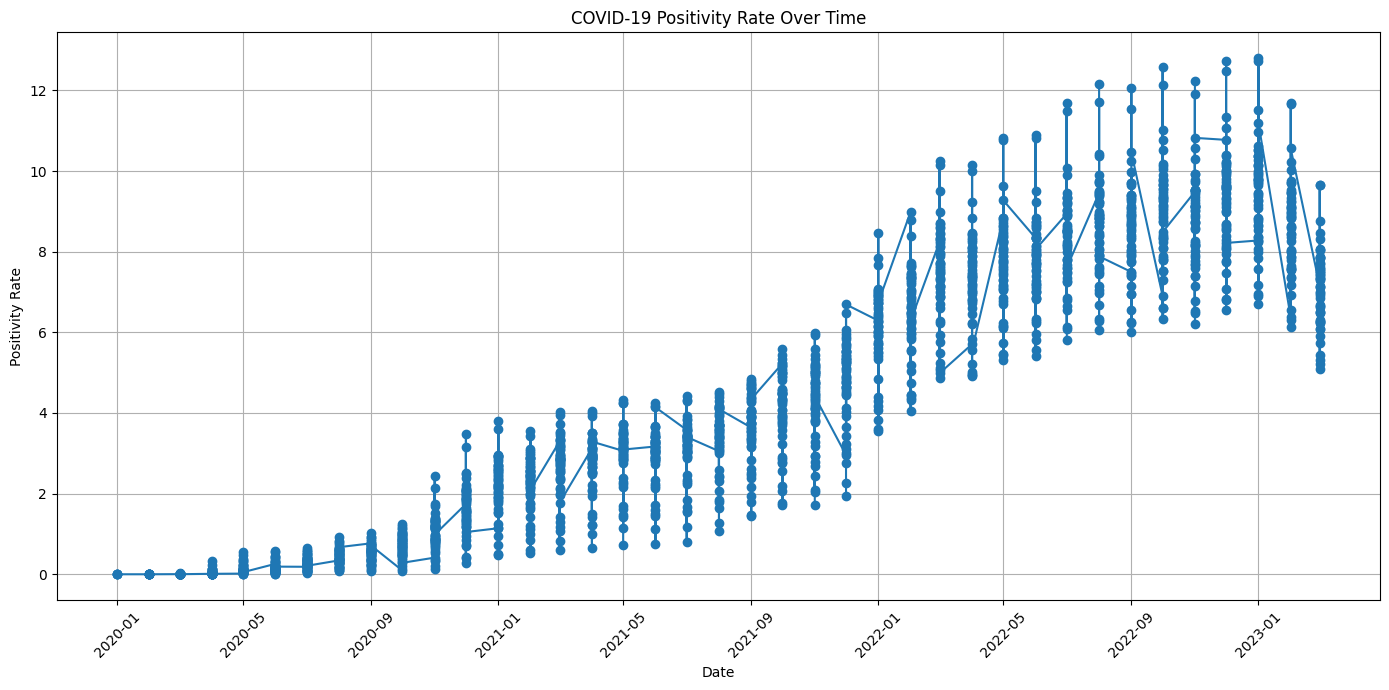

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_monthly_covid_data.csv' has been created by the previous steps
# Load the combined data
combined_data = pd.read_csv('combined_monthly_covid_data.csv')

# Convert 'year_month' to datetime for plotting
combined_data['year_month'] = pd.to_datetime(combined_data['year_month'].astype(str))

# Sort the data by date
combined_data.sort_values('year_month', inplace=True)

# Plotting the positivity rate
plt.figure(figsize=(14, 7))
plt.plot(combined_data['year_month'], combined_data['positivity_rate'], marker='o')

plt.title('COVID-19 Positivity Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


**State Level Depression analysis during COVID-19 according to Gender**

In [ ]:
import pandas as pd

# Assuming you have the data in CSV files
df1 = pd.read_csv('gender.csv')
df2 = pd.read_csv('age.csv')

# Cleaning the data: removing 'NSD' (No Sufficient Data) and converting to numeric
df1 = df1.replace('NSD', pd.NA).apply(pd.to_numeric, errors='coerce')
df2 = df2.replace('NSD', pd.NA).apply(pd.to_numeric, errors='coerce')

# Filling missing values with appropriate methods, e.g., mean of the column
df1 = df1.fillna(df1.mean())
df2 = df2.fillna(df2.mean())

# Calculating sex ratio (number of males per 100 females)
# Assuming the columns follow the pattern 'StateSex' where Sex is either 'Male' or 'Female'
male_columns = [col for col in df1.columns if 'Male' in col]
female_columns = [col.replace('Male', 'Female') for col in male_columns]

for male_col, female_col in zip(male_columns, female_columns):
    sex_ratio_col = male_col.replace('Male', 'SexRatio')
    df1[sex_ratio_col] = (df1[male_col] / df1[female_col]) * 100

# Analyzing age structure
# Assuming the columns follow the pattern 'StateAgeGroup' where AgeGroup is an age range
age_groups = ['0-18','18-29', '30-49', '50-64', '65+']
for age_group in age_groups:
    age_group_columns = [col for col in df2.columns if age_group in col]
    df2[f'Avg_{age_group}'] = df2[age_group_columns].mean(axis=1)

# Now df1 has the sex ratio and df2 has the average values for each age group
# You can further analyze these dataframes as per your requirements

# Saving the cleaned and processed data to new CSV files
df1.to_csv('cleaned_dataset1.csv', index=False)
df2.to_csv('cleaned_dataset2.csv', index=False)


KeyError: 'United States Female'

In [ ]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('gender.csv')  # Gender data
df2 = pd.read_csv('age.csv')  # Age data


In [ ]:
df1

,Timeline,United States Male,United StatesFemale,Alabama Male,AlabamaFemale,Alaska Male,AlaskaFemale,Arizona Male,ArizonaFemale,Arkansas Male,...,VirginiaMale,VirginiaFemale,WashingtonMale,WashingtonFemale,West VirginiaMale,West VirginiaFemale,WisconsinMale,WisconsinFemale,WyomingMale,WyomingFemale
0,4/23/2020-5/5/2020,0.310,0.407,0.252,0.348,0.305,0.326,0.317,0.409,0.344,...,0.307,0.364,0.274,0.422,0.338,0.347,0.276,0.346,0.283,0.337
1,5/7/2020-5/12/2020,0.314,0.372,0.166,0.421,0.356,0.359,0.355,0.413,0.304,...,0.255,0.356,0.309,0.389,0.353,0.426,0.224,0.370,0.294,0.265
2,5/14/2020-5/19/2020,0.299,0.376,0.197,0.300,0.286,0.370,0.312,0.329,0.329,...,0.311,0.331,0.311,0.348,0.311,0.374,0.232,0.325,0.271,0.289
3,5/21/2020-5/26/2020,0.303,0.381,0.250,0.324,0.309,0.422,0.338,0.371,0.313,...,0.330,0.332,0.312,0.324,0.361,0.396,0.254,0.322,0.234,0.330
4,5/28/2020-6/2/2020,0.311,0.396,0.290,0.448,0.248,0.386,0.284,0.366,0.363,...,0.275,0.351,0.334,0.400,0.352,0.423,0.204,0.329,0.248,0.409
5,6/4/2020-6/9/2020,0.319,0.400,0.309,0.425,0.279,0.431,0.312,0.422,0.376,...,0.372,0.359,0.264,0.375,0.369,0.409,0.230,0.334,0.275,0.313
6,6/11/2020-6/16/2020,0.327,0.391,0.384,0.378,0.319,0.413,0.268,0.395,0.345,...,0.257,0.419,0.258,0.422,0.323,0.320,0.240,0.288,0.267,0.387
7,6/18/2020-6/23/2020,0.324,0.396,0.401,0.362,0.324,0.420,0.333,0.463,0.317,...,0.325,0.409,0.313,0.379,0.360,0.406,0.160,0.330,0.280,0.287
8,6/25/2020-6/30/2020,0.338,0.415,0.337,0.378,0.303,0.408,0.419,0.462,0.371,...,0.282,0.376,0.422,0.418,0.473,0.430,0.266,0.317,0.301,0.380
9,7/2/2020-7/7/2020,0.365,0.413,0.358,0.431,0.323,0.337,0.416,0.431,0.393,...,0.380,0.389,0.361,0.475,0.276,0.409,0.329,0.353,0.283,0.439


In [ ]:
df2

,Timeline,Mid_date,United States18-29,United States30-49,United States50-64,United States65+,Alabama18-29,Alabama30-49,Alabama50-64,Alabama65+,...,West Virginia50-64,West Virginia65+,Wisconsin18-29,Wisconsin30-49,Wisconsin50-64,Wisconsin65+,Wyoming18-29,Wyoming30-49,Wyoming50-64,Wyoming65+
0,4/23/2020-5/5/2020,2020-04-30,0.468,0.393,0.343,0.236,0.342,0.357,0.312,0.146,...,0.367,NSD,0.480,0.341,0.285,0.169,0.407,0.361,0.316,0.164
1,5/7/2020-5/12/2020,2020-05-10,0.474,0.382,0.336,0.197,0.564,0.246,0.348,0.283,...,0.432,0.235,0.586,0.301,0.300,NSD,NSD,0.344,0.316,NSD
2,5/14/2020-5/19/2020,2020-05-17,0.477,0.366,0.326,0.199,0.414,0.244,0.244,NSD,...,0.343,NSD,0.392,0.368,0.184,0.193,0.508,0.336,0.168,NSD
3,5/21/2020-5/26/2020,2020-05-24,0.466,0.377,0.325,0.214,0.376,0.325,0.229,0.235,...,0.402,NSD,0.385,0.344,0.237,0.213,0.293,0.387,0.218,0.188
4,5/28/2020-6/2/2020,2020-05-31,0.493,0.388,0.317,0.234,0.39,0.454,0.340,0.293,...,0.382,0.344,0.419,0.306,0.279,0.108,0.54,0.311,0.320,0.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Print the column names of the gender DataFrame
print(gender.columns)


Index(['Timeline', 'United States Male', 'United StatesFemale', 'Alabama Male',
       'AlabamaFemale', 'Alaska Male', 'AlaskaFemale', 'Arizona Male',
       'ArizonaFemale', 'Arkansas Male',
       ...
       'WashingtonMale', 'WashingtonFemale', 'West VirginiaMale',
       'West VirginiaFemale', 'WisconsinMale', 'WisconsinFemale',
       'WyomingMale', 'WyomingFemale', 'Start_Date', 'End_Date'],
      dtype='object', length=107)


In [ ]:
import pandas as pd

# Load the datasets
gender = pd.read_csv('gender.csv')
age = pd.read_csv('age.csv')

# Split the 'Timeline' column into 'Start_Date' and 'End_Date' for both datasets
gender[['Start_Date', 'End_Date']] = gender['Timeline'].str.split('-', expand=True)
age[['Start_Date', 'End_Date']] = age['Timeline'].str.split('-', expand=True)

# Strip any whitespace and convert 'Start_Date' and 'End_Date' to datetime in both datasets
gender['Start_Date'] = pd.to_datetime(gender['Start_Date'].str.strip(), format='%m/%d/%Y', errors='coerce')
gender['End_Date'] = pd.to_datetime(gender['End_Date'].str.strip(), format='%m/%d/%Y', errors='coerce')
age['Start_Date'] = pd.to_datetime(age['Start_Date'].str.strip(), format='%m/%d/%Y', errors='coerce')
age['End_Date'] = pd.to_datetime(age['End_Date'].str.strip(), format='%m/%d/%Y', errors='coerce')

# Replace 'NSD' with NaN and convert columns to numeric, assuming 'Date' column exists
gender = gender.replace('NSD', pd.NA).apply(pd.to_numeric, errors='coerce', downcast='integer')
age = age.replace('NSD', pd.NA).apply(pd.to_numeric, errors='coerce', downcast='integer')

# Fill missing values with the mean of each column
gender.fillna(gender.mean(), inplace=True)
age.fillna(age.mean(), inplace=True)

# Calculate sex ratio (number of males per 100 females)
for col in gender.columns:
    if 'Male' in col and 'United StatesFemale' in col.replace('Male', 'Female'):
        female_col = col.replace('Male', 'Female')
        gender[col + '_to_' + female_col + '_Ratio'] = (gender[col] / gender[female_col]) * 100

# Assuming the age dataset has columns for different age groups
# Calculate the average value for each age group
age_groups = ['18-29', '30-49', '50-64', '65+']
for age_group in age_groups:
    age_group_columns = [col for col in age.columns if age_group in col]
    age[f'Avg_{age_group}'] = age[age_group_columns].mean(axis=1)

# Now you can further analyze these dataframes as per your requirements
# ...

# Save the cleaned and processed data to new CSV files
gender.to_csv('cleaned_gender_data.csv', index=False)
age.to_csv('cleaned_age_data.csv', index=False)


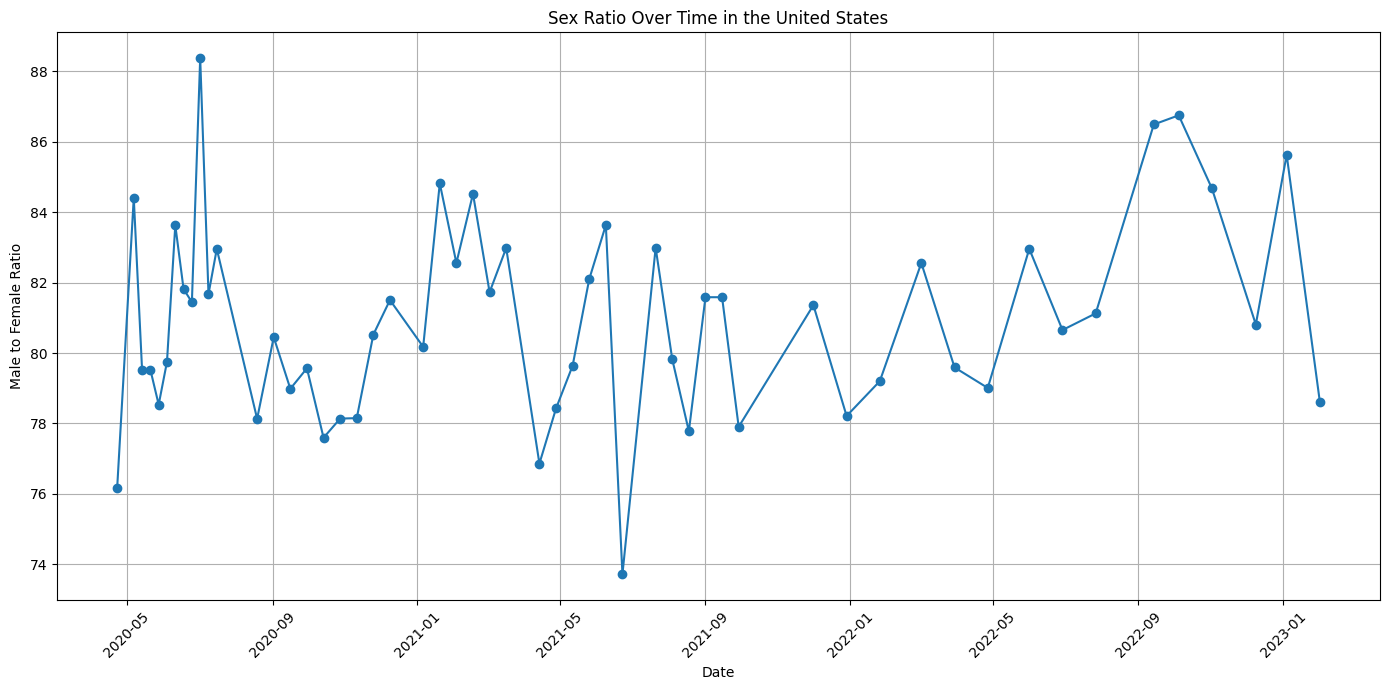

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned gender data
gender_data = pd.read_csv('cleaned_gender_data.csv')

# Convert 'Start_Date' to datetime for plotting
gender_data['Start_Date'] = pd.to_datetime(gender_data['Start_Date'])

# Calculate the sex ratio for the United States
# Replace 'United StatesMale' and 'United StatesFemale' with the actual column names from your dataset
gender_data['United States Male_to_United StatesFemale Ratio'] = (gender_data['United States Male'] / gender_data['United StatesFemale']) * 100

# Sort the data by date
gender_data.sort_values('Start_Date', inplace=True)

# Plot the sex ratio over time for the United States
plt.figure(figsize=(14, 7))
plt.plot(gender_data['Start_Date'], gender_data['United States Male_to_United StatesFemale Ratio'], marker='o')

plt.title('Sex Ratio Over Time in the United States')
plt.xlabel('Date')
plt.ylabel('Male to Female Ratio')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()
